# Data Cleaning and Exploration

In [1]:
import pandas as pd
import numpy as np
zillow_df = pd.read_csv('zillow_feature_sample.csv')
zillow_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,12833975,NaN,NaN,NaN,3.0,4.0,NaN,6.0,3.0,NaN,...,NaN,NaN,155403.0,304592.0,2016.0,149189.0,3708.29,NaN,NaN,6.037409e+13
1,11070096,1.0,NaN,NaN,4.0,4.0,NaN,7.0,4.0,NaN,...,NaN,NaN,493070.0,821783.0,2016.0,328713.0,10087.59,NaN,NaN,6.037108e+13
2,12752672,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,NaN,...,NaN,NaN,126695.0,247962.0,2016.0,121267.0,3377.86,NaN,NaN,6.037504e+13
3,11338563,NaN,NaN,NaN,3.0,4.0,NaN,7.0,3.0,NaN,...,NaN,NaN,130500.0,308900.0,2016.0,178400.0,3578.92,NaN,NaN,6.037920e+13
4,17098704,NaN,NaN,NaN,0.0,3.0,NaN,NaN,NaN,NaN,...,1.0,NaN,142271.0,223101.0,2016.0,80830.0,2564.86,NaN,NaN,6.111000e+13


In [2]:
# Lets see Nan by feature and what percentage of total is missing

# Calculate total NaN count for each column
nan_count = zillow_df.isna().sum()

# Calculate percentage of NaN values for each column
nan_percentage = (zillow_df.isna().sum() / len(zillow_df)) * 100

# Create a summary table
nan_summary = pd.DataFrame({
    'Column': zillow_df.columns,
    'Total NaN': nan_count,
    'Percentage NaN': nan_percentage
})

# Reset the index to make it more readable
nan_summary = nan_summary.reset_index(drop=True)

print(nan_summary)


                          Column  Total NaN  Percentage NaN
0                       parcelid          0            0.00
1          airconditioningtypeid       7219           72.19
2       architecturalstyletypeid       9987           99.87
3                   basementsqft       9996           99.96
4                    bathroomcnt         13            0.13
5                     bedroomcnt         13            0.13
6            buildingclasstypeid       9961           99.61
7          buildingqualitytypeid       3530           35.30
8              calculatedbathnbr        388            3.88
9                     decktypeid       9932           99.32
10      finishedfloor1squarefeet       9305           93.05
11  calculatedfinishedsquarefeet        149            1.49
12          finishedsquarefeet12        859            8.59
13          finishedsquarefeet13       9974           99.74
14          finishedsquarefeet15       9388           93.88
15          finishedsquarefeet50       9

In [3]:
# Replace some specific columns where is Nan with 0
# List of columns to replace NaN with 0
columns_to_fill = ['poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 
                   'pooltypeid7','fireplacecnt' ,'hashottuborspa',
                   'airconditioningtypeid','basementsqft','regionidneighborhood']

# Replace NaN with 0 for the specified columns
zillow_df[columns_to_fill] = zillow_df[columns_to_fill].fillna(0)

# For numberofstories, we will replace the Nan with 1
zillow_df['numberofstories'] = zillow_df['numberofstories'].fillna(1)


In [4]:
# Relationship are too complex at this point.  I decided to remove all remaining columns with more than 60% missing values.
# this way the remaining columns analysis will be more manageable

# percentage of missing values for each column
percent_missing = zillow_df.isna().mean() * 100

# threshold. I decided 60
threshold = 60

# Filter out columns with missing value percentage greater than the threshold
filtered_df = zillow_df.loc[:, percent_missing <= threshold]



In [5]:

# Lets see Nan by feature and what percentage of total is missing

# Calculate total NaN count for each column
nan_count = filtered_df.isna().sum()

# Calculate percentage of NaN values for each column
nan_percentage = (filtered_df.isna().sum() / len(filtered_df)) * 100

# Create a summary table
nan_summary = pd.DataFrame({
    'Column': filtered_df.columns,
    'Total NaN': nan_count,
    'Percentage NaN': nan_percentage
})

# Reset the index to make it more readable
nan_summary = nan_summary.reset_index(drop=True)

print(nan_summary)


                          Column  Total NaN  Percentage NaN
0                       parcelid          0            0.00
1          airconditioningtypeid          0            0.00
2                   basementsqft          0            0.00
3                    bathroomcnt         13            0.13
4                     bedroomcnt         13            0.13
5          buildingqualitytypeid       3530           35.30
6              calculatedbathnbr        388            3.88
7   calculatedfinishedsquarefeet        149            1.49
8           finishedsquarefeet12        859            8.59
9                           fips         13            0.13
10                  fireplacecnt          0            0.00
11                   fullbathcnt        388            3.88
12                hashottuborspa          0            0.00
13         heatingorsystemtypeid       3757           37.57
14                      latitude         13            0.13
15                     longitude        

In [6]:
## BedroomCount and BathroomCount
### I found that in all these cases all other values were also missing
### I will delete these rows as well

filtered_df2 = filtered_df.dropna(subset=['bedroomcnt'])

# We can see value are skewed toward a few values. For these we will replace Nan with MODE

# Replace NaN values with the most common value in 'buildingqualitytypeid'
most_common_value = filtered_df2['buildingqualitytypeid'].mode()[0]
filtered_df2.loc[:, 'buildingqualitytypeid'] = filtered_df2['buildingqualitytypeid'].fillna(most_common_value)

# Replace NaN values with the most common value in 'propertyzoningdesc'
most_common_value = filtered_df2['propertyzoningdesc'].mode()[0]
filtered_df2.loc[:, 'propertyzoningdesc'] = filtered_df2['propertyzoningdesc'].fillna(most_common_value)

# I will folllow same strategy replace with most common as values are for sure concentrated in a single category

# Replace NaN values with the most common value in 'heatingorsystemtypeid'
most_common_value = filtered_df2['heatingorsystemtypeid'].mode()[0]
filtered_df2.loc[:, 'heatingorsystemtypeid'] = filtered_df2['heatingorsystemtypeid'].fillna(most_common_value)

# Replace NaN values with the most common value in 'unitcnt'
most_common_value = filtered_df2['unitcnt'].mode()[0]
filtered_df2.loc[:, 'unitcnt'] = filtered_df2['unitcnt'].fillna(most_common_value)


# for the rest of values I will replace with the numerical ones with the mean rounded to the nearest full integer.
# For the non-numerical I will replace with the most frequent value

# make a copy and make changes on copy in case we need to revert something
filtered_df3 = filtered_df2.copy()

# Loop through each column in the DataFrame
for column in filtered_df3.columns:
    # Check if the column is numeric
    if filtered_df3[column].dtype.kind in 'biufc':  # Numeric types
        # Calculate the mean, round it, and fill NaN values
        filtered_df3[column] = filtered_df3[column].fillna(filtered_df3[column].mean().round())
    else:
        # For non-numeric columns, fill NaN with the mode (most common value)
        filtered_df3[column] = filtered_df3[column].fillna(filtered_df3[column].mode()[0])

In [7]:
filtered_df3.isna().sum()

parcelid                        0
airconditioningtypeid           0
basementsqft                    0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fireplacecnt                    0
fullbathcnt                     0
hashottuborspa                  0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
poolcnt                         0
poolsizesum                     0
pooltypeid10                    0
pooltypeid2                     0
pooltypeid7                     0
propertycountylandusecode       0
propertylandusetypeid           0
propertyzoningdesc              0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidneighborhood            0
regionidzip   

### Generate a summary table that shows the mean, median, and standard deviation of taxvaluedollarcnt, structuretaxvaluedollarcnt,and landtaxvaluedollarcnt for properties built in each decade (1960s,1970s,etc.)

In [8]:
filtered_df3['decade'] = (filtered_df3['yearbuilt'] // 10 * 10).astype(int)
filtered_df3.head()

,parcelid,airconditioningtypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,decade
0,12833975,0.0,0.0,3.0,4.0,6.0,3.0,1812.0,1812.0,6037.0,...,1.0,1955.0,1.0,155403.0,304592.0,2016.0,149189.0,3708.29,6.037409e+13,1950
1,11070096,1.0,0.0,4.0,4.0,7.0,4.0,3134.0,3134.0,6037.0,...,1.0,2012.0,1.0,493070.0,821783.0,2016.0,328713.0,10087.59,6.037108e+13,2010
2,12752672,1.0,0.0,2.0,3.0,6.0,2.0,1817.0,1817.0,6037.0,...,1.0,1957.0,1.0,126695.0,247962.0,2016.0,121267.0,3377.86,6.037504e+13,1950
3,11338563,0.0,0.0,3.0,4.0,7.0,3.0,2280.0,2280.0,6037.0,...,1.0,2006.0,1.0,130500.0,308900.0,2016.0,178400.0,3578.92,6.037920e+13,2000
4,17098704,0.0,0.0,0.0,3.0,6.0,2.0,1200.0,1200.0,6111.0,...,1.0,1987.0,1.0,142271.0,223101.0,2016.0,80830.0,2564.86,6.111000e+13,1980


In [9]:
summary_table = filtered_df3.groupby('decade').agg({
    'taxvaluedollarcnt': ['mean', 'median', 'std'],
    'structuretaxvaluedollarcnt': ['mean', 'median', 'std'],
    'landtaxvaluedollarcnt': ['mean', 'median', 'std']
})

summary_table.head(20)


taxvaluedollarcnt                          structuretaxvaluedollarcnt  \
                    mean     median           std                       mean   
decade                                                                         
1860        2.600588e+06  2600588.0           NaN              104023.000000   
1880        4.738152e+05   450008.0  2.343921e+05              141027.250000   
1890        2.982841e+05   195041.5  2.100909e+05              100655.400000   
1900        2.947590e+05   254328.0  2.328035e+05              114436.281553   
1910        3.970185e+05   252592.0  7.240961e+05              124393.658228   
1920        4.307278e+05   279054.0  6.367015e+05              135457.115899   
1930        4.996180e+05   336282.0  5.925838e+05              174301.759312   
1940        3.667909e+05   290651.0  3.331901e+05              124508.564730   
1950        3.572183e+05   279524.0  4.597441e+05              119795.369756   
1960        3.850663e+05   308654.0  4.687157e+05              148481.972621   
1970        3.923405e+05   319514.0  3.149764e+05              155989.059030   
1980        4.631164e+05   349241.0  7.678608e+05              214355.850445   
1990        5.819065e+05   448403.0  5.263246e+05              277969.526232   
2000        7.790741e+05   565401.0  7.698998e+05              380476.150665   
2010        9.820240e+05   695630.0  1.158167e+06              453468.094937   

                                landtaxvaluedollarcnt             \
          median            std                  mean     median   
decade                                                             
1860    104023.0            NaN          2.496565e+06  2496565.0   
1880    128322.0   83936.496493          3.327880e+05   283388.5   
1890     38199.5  110791.408959          1.976287e+05   152385.0   
1900     75057.0  112924.130537          1.803227e+05   146301.0   
1910     73706.0  197842.060825          2.726249e+05   166412.0   
1920     90344.0  185082.733760          2.955343e+05   172972.0   
1930    105911.0  236973.065579          3.253162e+05   218224.0   
1940     96446.0  109327.290553          2.424662e+05   182534.0   
1950     94593.5  110307.597096          2.375975e+05   168479.0   
1960    116012.5  193772.024850          2.527687e+05   189132.5   
1970    132648.0   96316.513355          2.367349e+05   164449.0   
1980    169129.0  249421.152059          2.496936e+05   164252.0   
1990    215433.0  221582.801316          3.052703e+05   217546.0   
2000    277159.0  373309.990084          3.994656e+05   268831.0   
2010    332221.0  465484.143630          5.319773e+05   369210.0   

                       
                  std  
decade                 
1860              NaN  
1880    226589.896822  
1890    136610.951629  
1900    148736.981612  
1910    553421.014607  
1920    483498.193651  
1930    398038.632866  
1940    251911.279185  
1950    393788.978984  
1960    318918.766651  
1970    254980.967524  
1980    541311.985928  
1990    354134.257012  
2000    479998.964627  
2010    829523.303181

# Feature Engineering

In [10]:
# Create a new feature Age

filtered_df3['Age'] = filtered_df3['assessmentyear'] - filtered_df3['yearbuilt'] 

In [11]:
# Add a HasPool column

#filtered_df3['HasPool'] = np.where(filtered_df3['poolcnt'] >= 1, 1, 0)
filtered_df3['HasPool'] = (filtered_df3['poolcnt'] >= 1).astype(int)


In [12]:
# Specifically, report the median age of the properties
filtered_df3['Age'].median()

52.0

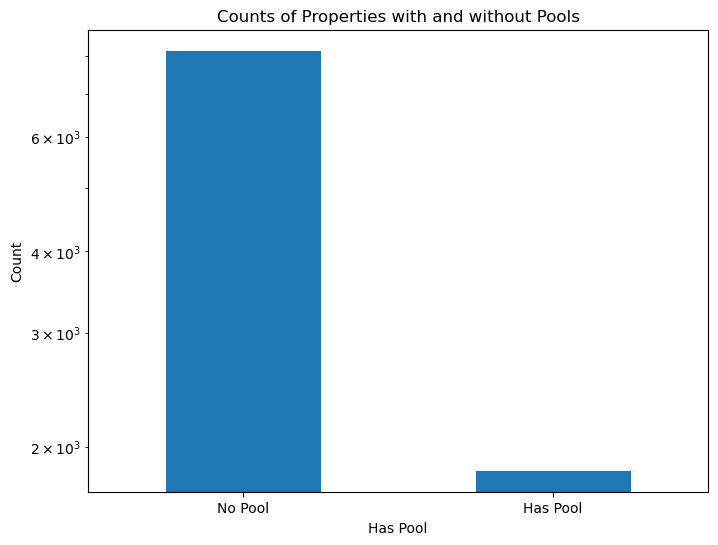

In [13]:
# Plot HasPool as BarChart

import matplotlib.pyplot as plt

# Generate counts of the binary feature "HasPool"
pool_counts = filtered_df3['HasPool'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
pool_counts.plot(kind='bar')
plt.xlabel('Has Pool')
plt.ylabel('Count')
plt.title('Counts of Properties with and without Pools')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.xticks(ticks=[0, 1], labels=['No Pool', 'Has Pool'], rotation=0)  # Improve readability of x-axis labels

# Show the plot
plt.show()

# Correlation Analysis

Pearson correlation coefficient between bedroomcnt and bathroomcnt: 0.6995785515520555


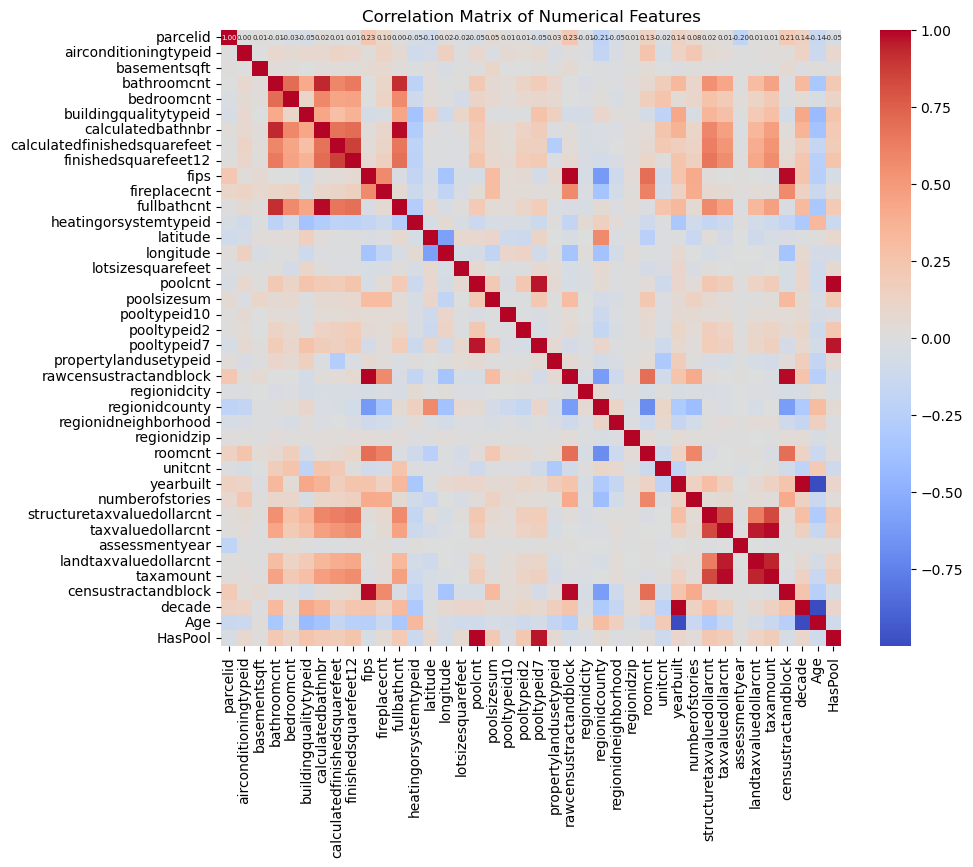

In [14]:
import seaborn as sns

#1 Calculate the Pearson correlation coefficient
corr_coefficient = np.corrcoef(filtered_df3['bedroomcnt'], filtered_df3['bathroomcnt'])[0, 1]

print(f"Pearson correlation coefficient between bedroomcnt and bathroomcnt: {corr_coefficient}")

# Corelation Matrix
#Select only numerical features for correlation matrix
numerical_features = filtered_df3.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_features.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, annot_kws={"size": 5})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Geospatial Analysis

D:\ComputerCode\JF_Environments\gwupythonclass-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ComputerCode\JF_Environments\gwupythonclass-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


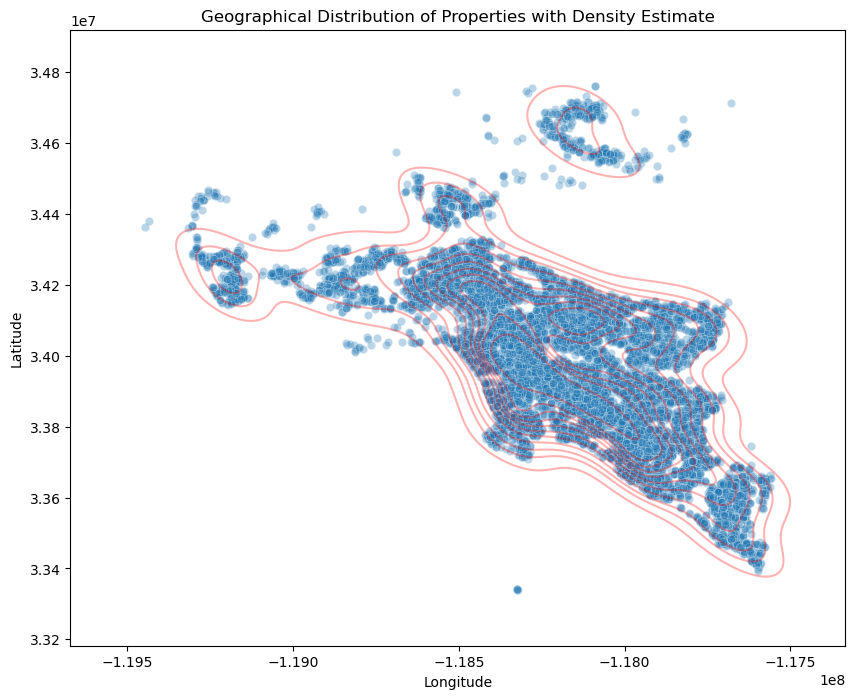

In [15]:
# Plot scatter plot of latitude and longitude

plt.figure(figsize=(10, 8))

sns.scatterplot(x=filtered_df3['longitude'], y=filtered_df3['latitude'], alpha=0.3)

# Overlay with density estimate
sns.kdeplot(x=filtered_df3['longitude'], y=filtered_df3['latitude'], levels=12, color="r", alpha=0.3)

plt.title('Geographical Distribution of Properties with Density Estimate')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Market Value Analysis

D:\ComputerCode\JF_Environments\gwupythonclass-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ComputerCode\JF_Environments\gwupythonclass-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


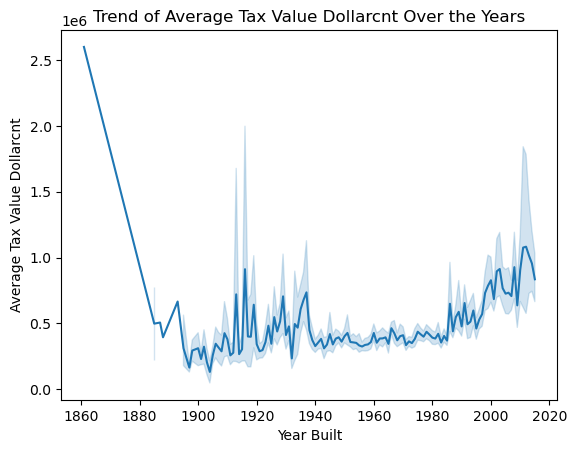

In [16]:
#1 
sns.lineplot(x='yearbuilt', y='taxvaluedollarcnt', data=filtered_df3, errorbar=('ci', 95))
plt.title('Trend of Average Tax Value Dollarcnt Over the Years')
plt.xlabel('Year Built')
plt.ylabel('Average Tax Value Dollarcnt')
plt.show()


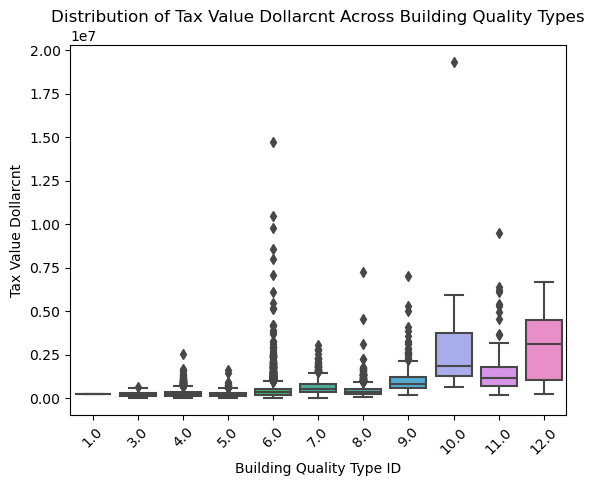

In [17]:
#2
sns.boxplot(x='buildingqualitytypeid', y='taxvaluedollarcnt', data=filtered_df3)

plt.title('Distribution of Tax Value Dollarcnt Across Building Quality Types')
plt.xlabel('Building Quality Type ID')
plt.ylabel('Tax Value Dollarcnt')
plt.xticks(rotation=45) 
plt.show()

# TaxAnalysis

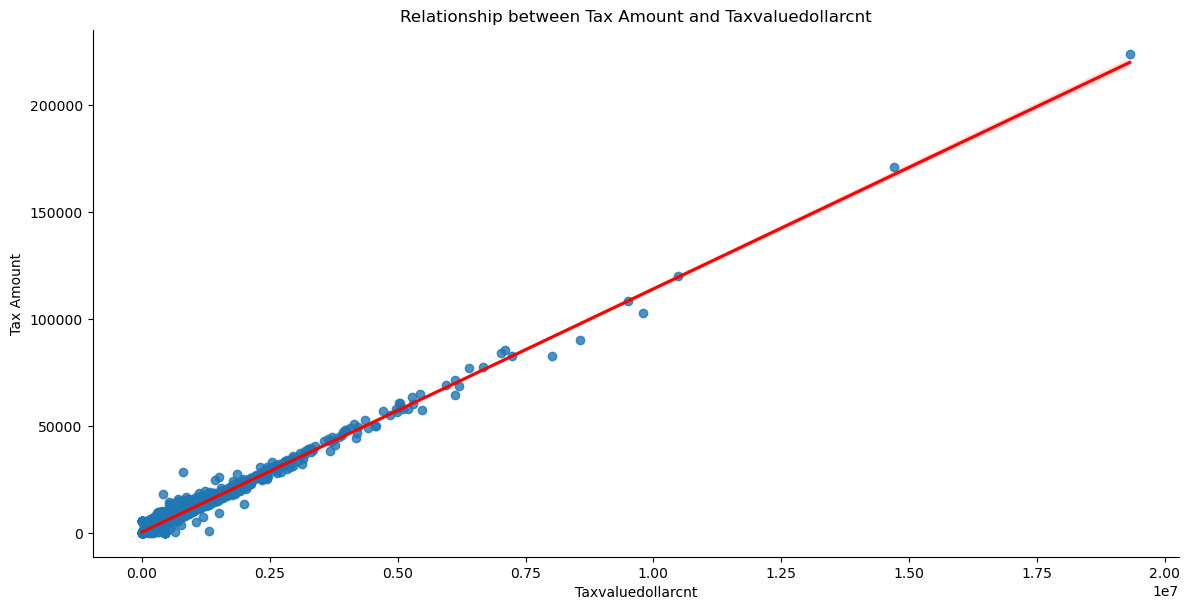

In [18]:
# Visualize the relationship with a regression line
sns.lmplot(x='taxvaluedollarcnt', y='taxamount', data=filtered_df3, aspect=2, height=6, line_kws={'color': 'red'})
plt.title('Relationship between Tax Amount and Taxvaluedollarcnt')
plt.xlabel('Taxvaluedollarcnt')
plt.ylabel('Tax Amount')
plt.show()

In [19]:
# I will used statsmodels to do this

import statsmodels.api as sm

X = filtered_df3['taxvaluedollarcnt']
y = filtered_df3['taxamount']

# Add an intercept)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(f"R-squared value: {model.rsquared}")

R-squared value: 0.9777742639147919


# Comparative Analysis

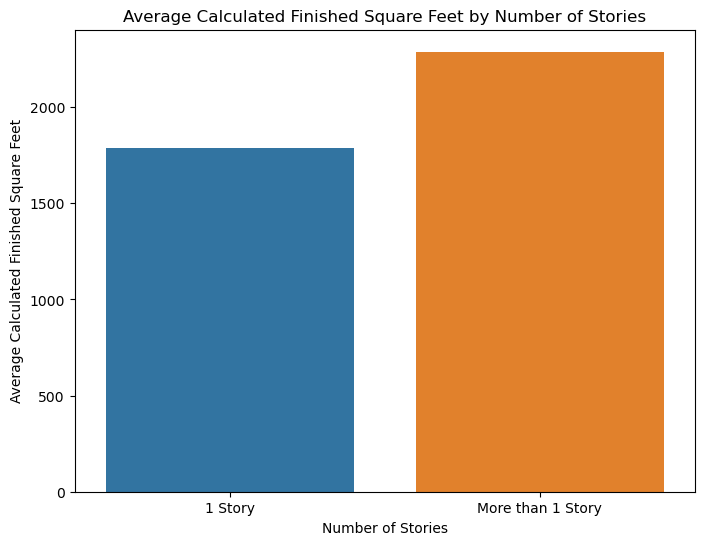

In [20]:
#1

# separate by number of stories
filtered_df3['Stories_Category'] = '1 Story'
filtered_df3.loc[filtered_df3['numberofstories'] > 1, 'Stories_Category'] = 'More than 1 Story'

# Calculate average calculatedfinishedsquarefeet for each 
avg_squarefeet = filtered_df3.groupby('Stories_Category')['calculatedfinishedsquarefeet'].mean().reset_index()

# Plot the averages using a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Stories_Category', y='calculatedfinishedsquarefeet', data=avg_squarefeet)
plt.title('Average Calculated Finished Square Feet by Number of Stories')
plt.ylabel('Average Calculated Finished Square Feet')
plt.xlabel('Number of Stories')
plt.show()

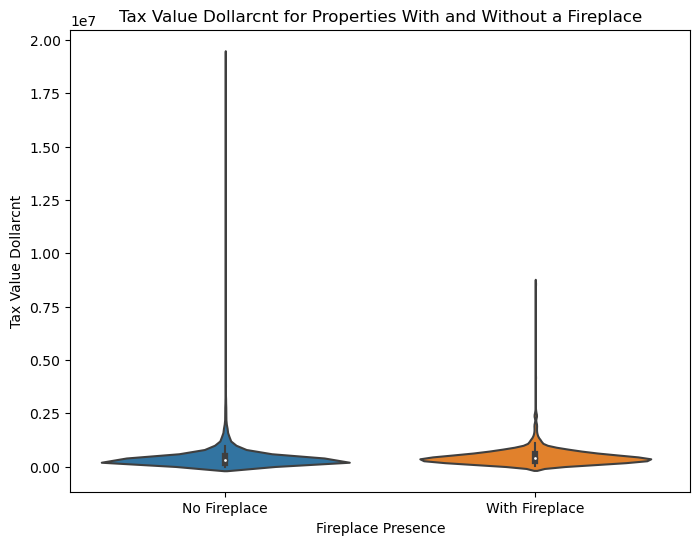

In [21]:
# 2 Violin Plot
# Let's create a flag column
filtered_df3['fireplaceflag'] = (filtered_df3['fireplacecnt'] > 0).astype(int)

plt.figure(figsize=(8, 6))
sns.violinplot(x='fireplaceflag', y='taxvaluedollarcnt', data=filtered_df3)

plt.title('Tax Value Dollarcnt for Properties With and Without a Fireplace')
plt.ylabel('Tax Value Dollarcnt')
plt.xlabel('Fireplace Presence')
plt.xticks([0, 1], ['No Fireplace', 'With Fireplace']) 

plt.show()


# Time-Series Forecasting

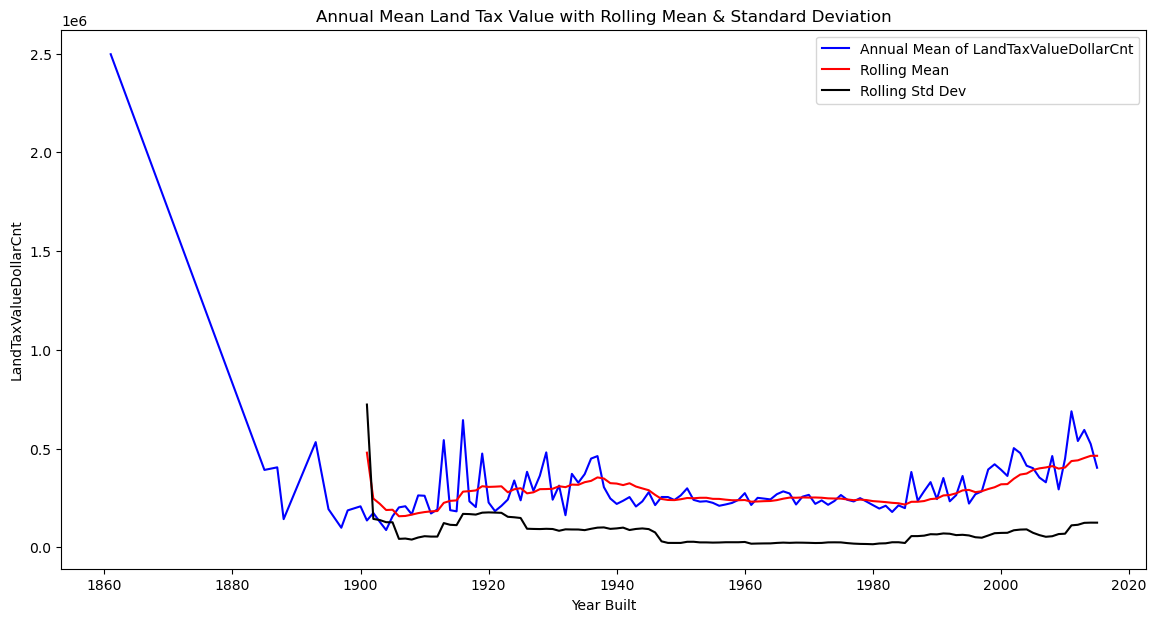

In [22]:
#For this one I couldn't figure out a way to forecast without using external packages like SARIMA, so I unfortunately I kept it
# as a rolling window of 10

annual_mean = filtered_df3.groupby('yearbuilt')['landtaxvaluedollarcnt'].mean()

# Convert Series to DataFrame
annualmean_df = annual_mean.reset_index()

annualmean_df.set_index('yearbuilt', inplace=True)

# Calculate rolling mean and standard deviation
window = 10 
rolling_mean = annualmean_df.rolling(window=window).mean()
rolling_std = annualmean_df.rolling(window=window).std()

# plot it!

plt.figure(figsize=(14, 7))
plt.plot(annualmean_df, color='blue', label='Annual Mean of LandTaxValueDollarCnt')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std Dev')
plt.legend(loc='best')
plt.title('Annual Mean Land Tax Value with Rolling Mean & Standard Deviation')
plt.xlabel('Year Built')
plt.ylabel('LandTaxValueDollarCnt')
plt.show()


# Amenities Impact Analysis

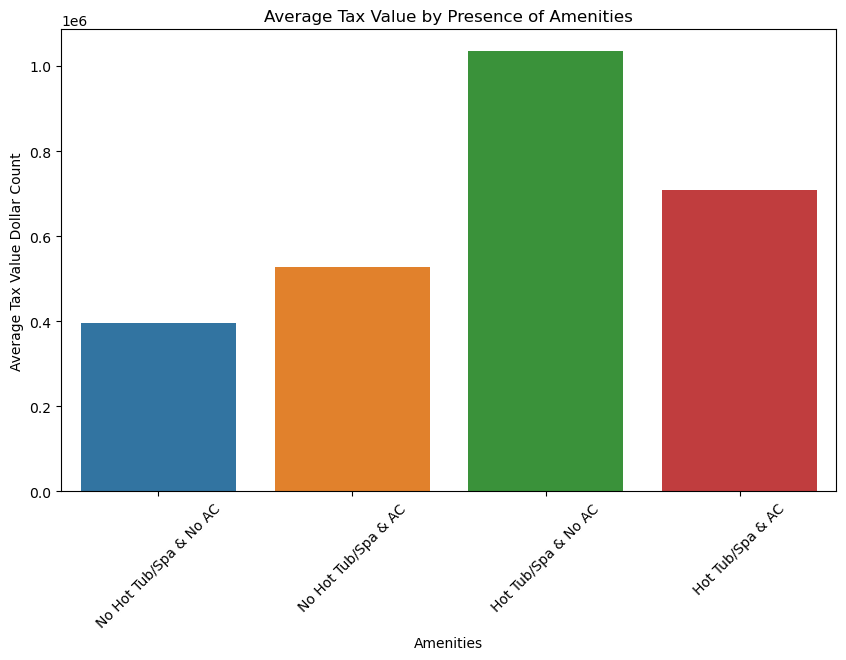

In [23]:

# Convert airconditioningtypeid to binary
filtered_df3['hasAirConditioning'] = np.where(filtered_df3['airconditioningtypeid'] > 0, 1, 0)

grouped_avg_tax = filtered_df3.groupby(['hashottuborspa', 'hasAirConditioning'])['taxvaluedollarcnt'].mean().reset_index()

# For this line I had to dig into stackoverflow.com to be able to get code I wanted/needed
grouped_avg_tax['Amenities'] = grouped_avg_tax.apply(lambda x: '{} & {}'.format('Hot Tub/Spa' if x['hashottuborspa'] == 1 else 'No Hot Tub/Spa', 
                                                                                 'AC' if x['hasAirConditioning'] == 1 else 'No AC'), axis=1)

# Plot it!
plt.figure(figsize=(10, 6))
sns.barplot(x='Amenities', y='taxvaluedollarcnt', data=grouped_avg_tax)
plt.xticks(rotation=45)
plt.title('Average Tax Value by Presence of Amenities')
plt.ylabel('Average Tax Value Dollar Count')
plt.xlabel('Amenities')
plt.show()


In [24]:
# Part 1 hypothesis testing

# Creating two groups: properties with and without a basement
with_basement = filtered_df3[filtered_df3['basementsqft'] > 0]['calculatedfinishedsquarefeet']
without_basement = filtered_df3[filtered_df3['basementsqft'].isna() | (filtered_df3['basementsqft'] == 0)]['calculatedfinishedsquarefeet']

from scipy import stats

# Performing a t-test
t_stat, p_value = stats.ttest_ind(with_basement.dropna(), without_basement.dropna(), equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.8706662065663987, P-value: 0.44797985472987


### With a p-value of 0.4479, it tells me they are not statitiscally different


D:\ComputerCode\JF_Environments\gwupythonclass-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ComputerCode\JF_Environments\gwupythonclass-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


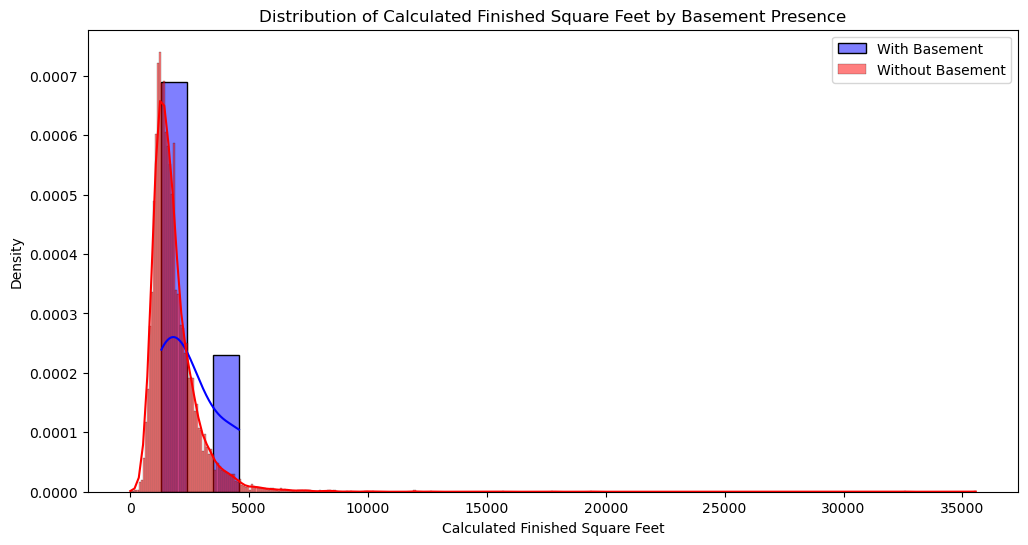

In [25]:
# Part 2
plt.figure(figsize=(12, 6))

sns.histplot(with_basement, color="blue", kde=True, stat="density", label="With Basement", alpha=0.5)

sns.histplot(without_basement, color="red", kde=True, stat="density", label="Without Basement", alpha=0.5)

plt.title('Distribution of Calculated Finished Square Feet by Basement Presence')
plt.xlabel('Calculated Finished Square Feet')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


# Neighborhood and Regional Analysis

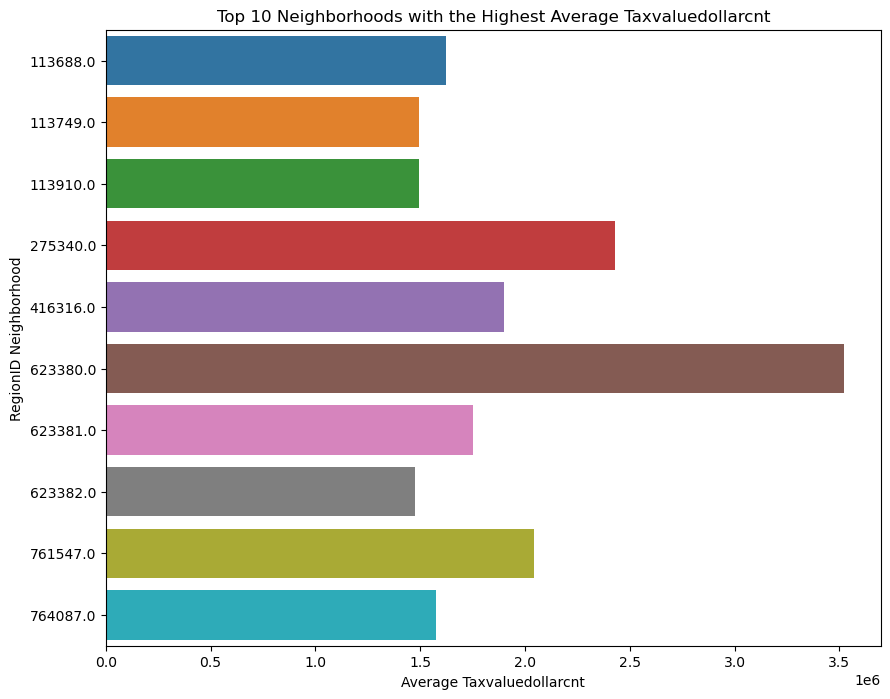

In [26]:
# Part 1

grouped_neighborhoods = filtered_df3.groupby('regionidneighborhood')['taxvaluedollarcnt'].mean().sort_values(ascending=False)

# Selecting the top 10 neighborhoods
top_neighborhoods = grouped_neighborhoods.head(10)

# plot bar
plt.figure(figsize=(10, 8))
sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, orient='h')
plt.title('Top 10 Neighborhoods with the Highest Average Taxvaluedollarcnt')
plt.xlabel('Average Taxvaluedollarcnt')
plt.ylabel('RegionID Neighborhood')
plt.show()


In [27]:
# Part 2
grouped_zip = filtered_df3.groupby('regionidzip')['taxamount'].sum().sort_values(ascending=False)

# Selecting the top 5 zip codes
top_zip_codes = grouped_zip.head(5)
y
# Calculating the 'other' categor
other_sum = grouped_zip.sum() - top_zip_codes.sum()

# Creating a Series for 'Other' to be concatenated with top_zip_codes
other_series = pd.Series(other_sum, index=['Other'])

# Concatenating the top_zip_codes with the other_series
top_zip_codes_with_other = pd.concat([top_zip_codes, other_series])

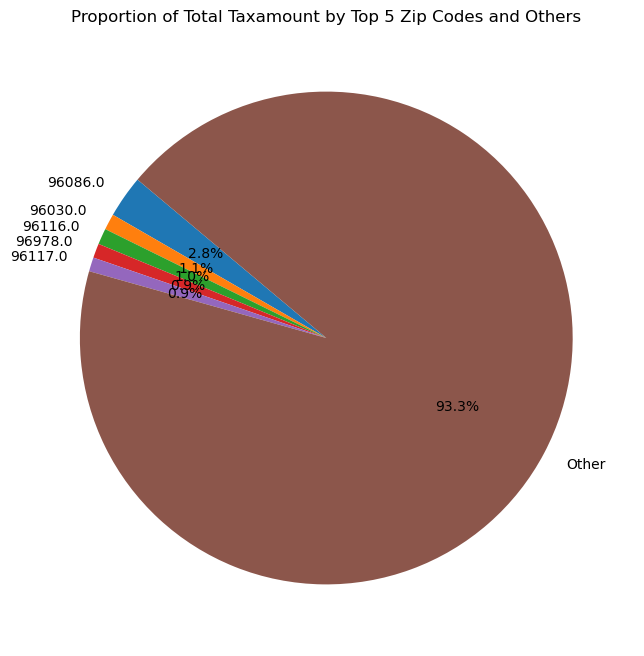

In [28]:
# Plotting the pie chart
plt.figure(figsize=(10, 8))
top_zip_codes_with_other.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Total Taxamount by Top 5 Zip Codes and Others')
plt.ylabel('')
plt.show()